In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import polyphase
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
M = [1,1,1,1] 
chi = 3.10*np.ones(int(0.5*4*(4-1)))
# M = [5,5,1,1] 
# chi = [1,0.5,0.5,0.5,0.5,1]

f = lambda x : polyphase.flory_huggins(x, M, chi)
engine = polyphase.PHASE(f,100,4)
engine.compute()
boundary_points = np.asarray([engine.is_boundary_point(x) for x in engine.grid.T])

Computation took 135.03s


## Plot slices of landscape along $\phi_4$

<IPython.core.display.Javascript object>


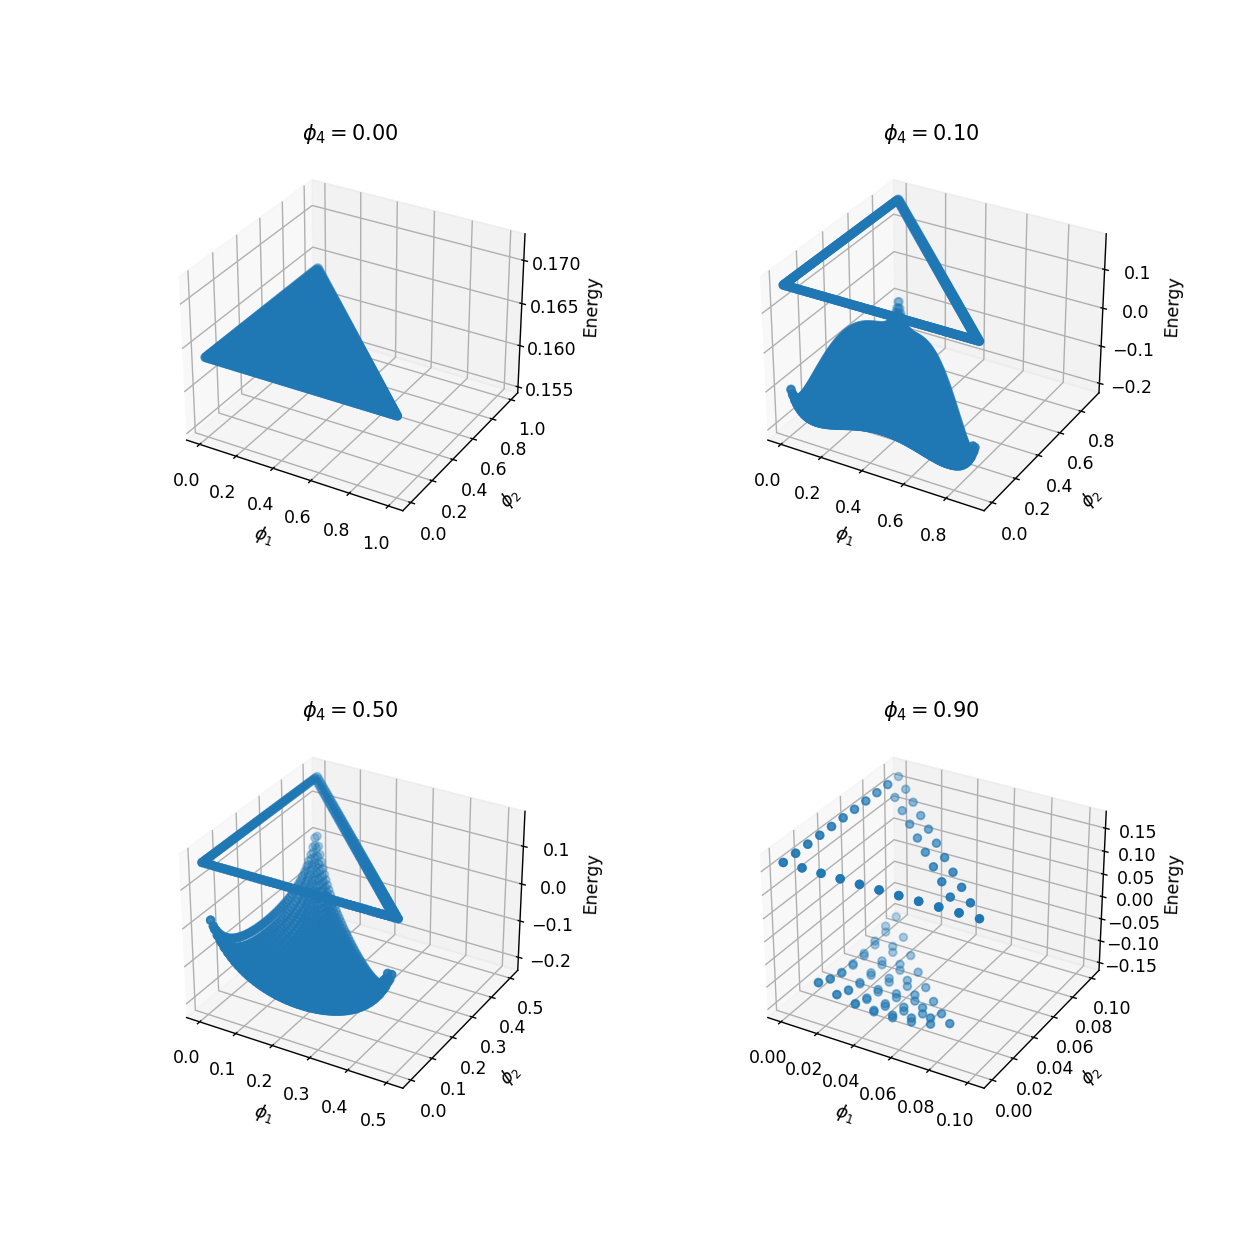

In [4]:
PLOT_BOUNDARIES = False # set it to True if you'd like to remove the boundary corrected energy

fig, axs = plt.subplots(2,2,figsize=(2*4,2*4),subplot_kw={'projection':'3d'})
fig.subplots_adjust(wspace=0.5,hspace=0.5)
axs = axs.flatten()
for ax,PHI4 in zip(axs,[1e-8,0.1,0.5,0.9]):
    slice_ids = np.isclose(engine.grid[3,:],PHI4, atol=0.01)
    if PLOT_BOUNDARIES:
        ids = np.logical_and(slice_ids,~boundary_points)
    else:
        ids = slice_ids
    ax.scatter(engine.grid.T[ids,0],engine.grid.T[ids,1], engine.energy[ids])
    ax.set_xlabel(r'$\phi_1$')
    ax.set_ylabel(r'$\phi_2$')
    ax.set_zlabel('Energy')
    ax.set_title(r'$\phi_4=$'+'{:.2f}'.format(PHI4))
plt.show()

## Plot energy landscapes of ternaries

<IPython.core.display.Javascript object>


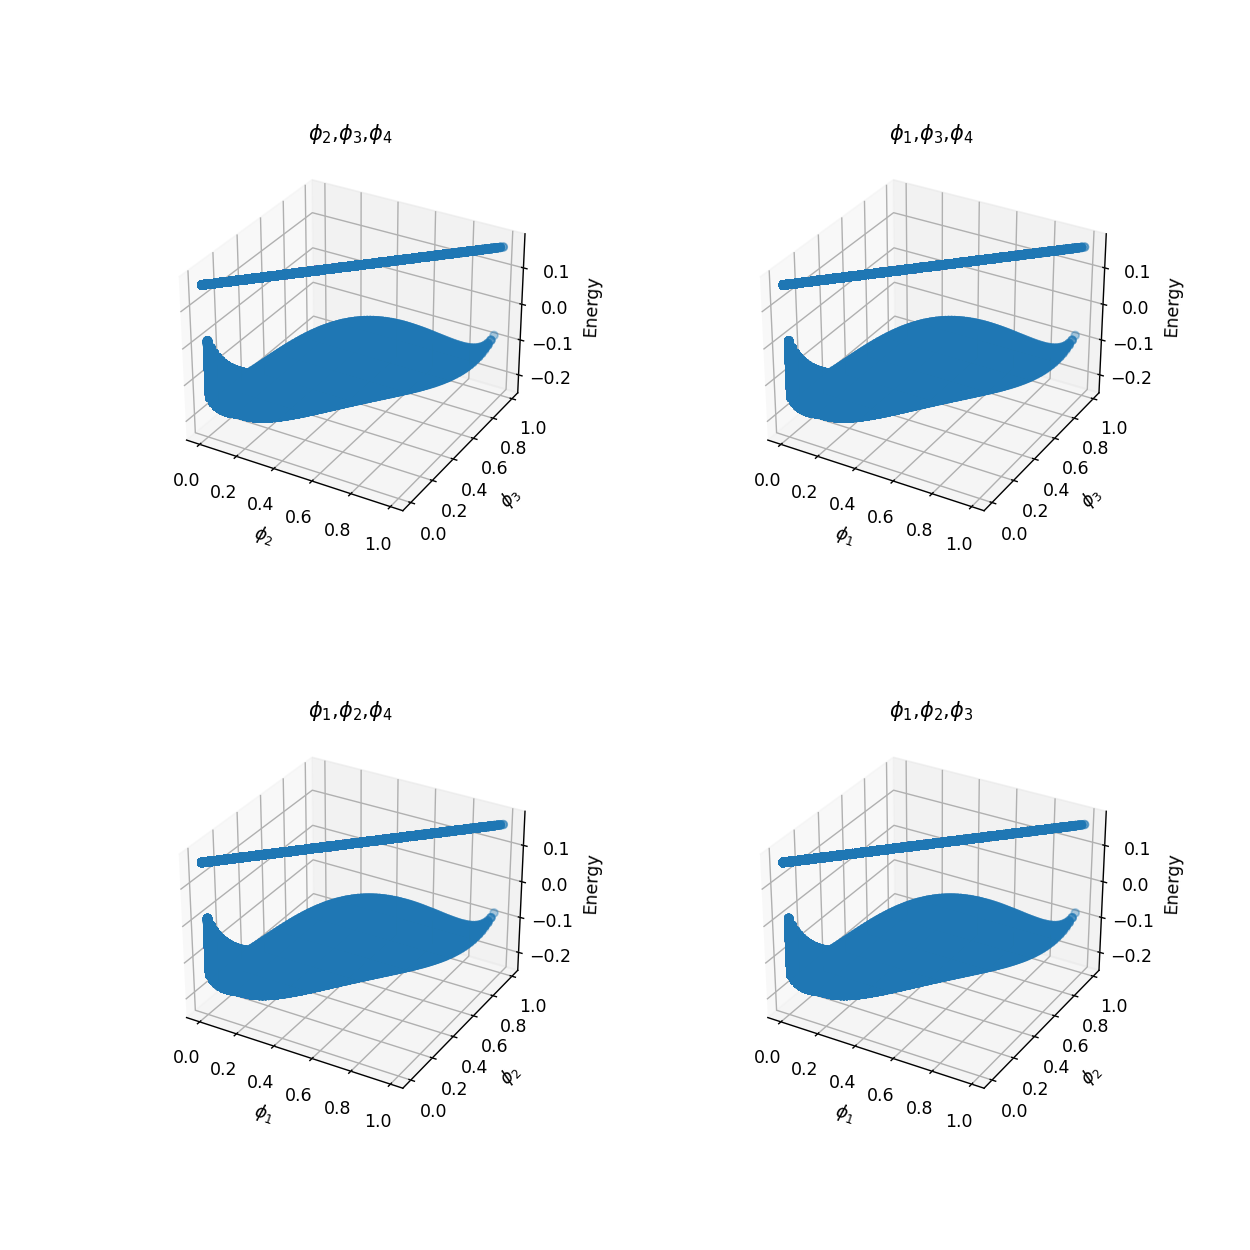

In [5]:
fig, axs = plt.subplots(2,2,figsize=(2*4,2*4),subplot_kw={'projection':'3d'})
fig.subplots_adjust(wspace=0.5,hspace=0.5)
axs = axs.flatten()
for i,ax in enumerate(axs):
    proj_ids = ~np.isclose(engine.grid[i,:],0, atol=0.01)
    if PLOT_BOUNDARIES:
        ids = np.logical_and(proj_ids,~boundary_points)
    else:
        ids = proj_ids
    plotids = list(set([0,1,2,3])-set([i]))
    ax.scatter(engine.grid.T[ids,plotids[0]],engine.grid.T[ids,plotids[0]], 
               engine.energy[ids])
    ax.set_xlabel(r'$\phi_{}$'.format(plotids[0]+1))
    ax.set_ylabel(r'$\phi_{}$'.format(plotids[1]+1))
    ax.set_zlabel('Energy')
    title = ','.join(r'$\phi_{}$'.format(i+1) for i in plotids)
    ax.set_title(title)
plt.show()